In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
from dishpylib.pyanalysis import tee_plot

# get data

In [4]:
df = pd.read_csv(
    's3://prq49/endeavor=16/stage=8+what=elaborated/a=series_profiles+stint=0-50%10+ext=.csv.xz',
    compression='xz',
)

In [5]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does fitness complexity change over time?

outplots/hue=series+viz=lineplot+x=stint+y=fitness-complexity+ext=.pdf


<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

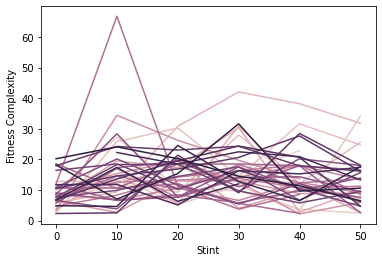

In [6]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fitness Complexity',
    hue='Series',
    legend=False,
)

outplots/viz=hline-swarmplot-boxplot+x=stint+y=fitness-complexity-delta+ext=.pdf


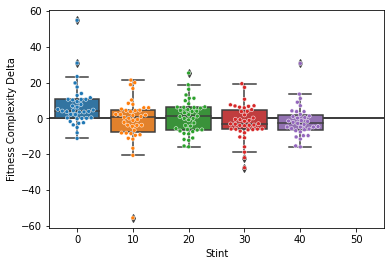

In [10]:
def hline_swarmplot_boxplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    hline_swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fitness Complexity Delta',
)

outplots/viz=hline-barplot+x=stint+y=fitness-complexity-delta+ext=.pdf


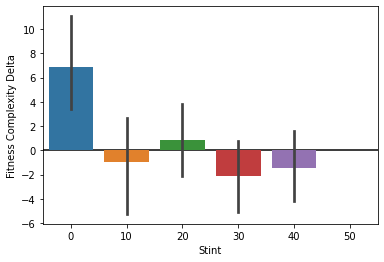

In [12]:
def hline_barplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.barplot(
        *args,
        **kwargs,
    )
    
tee_plot(
    hline_barplot,
    data=df,
    x='Stint',
    y='Fitness Complexity Delta',
)

outplots/viz=swarmplot-boxplot+x=stint+y=fitness-complexity+ext=.pdf


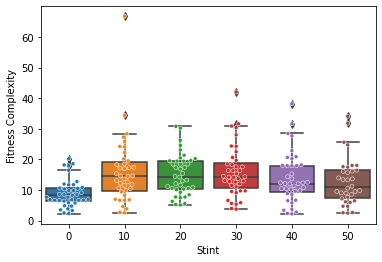

In [15]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fitness Complexity',
)

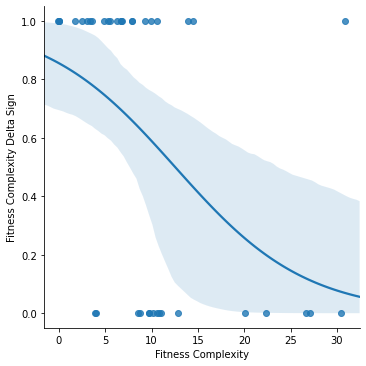

In [93]:
sns.lmplot(
    data=df80,
    x='Fitness Complexity',
    y='Fitness Complexity Delta Sign',
    logistic=True,
    truncate=False,
)

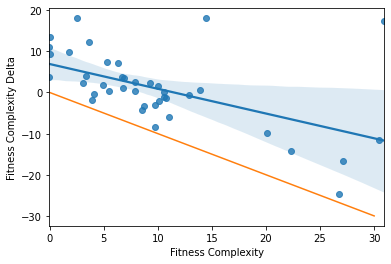

In [20]:
sns.regplot(data=df[df['Stint'] == 80],x='Fitness Complexity', y='Fitness Complexity Delta')
plt.plot([0,30], [0,-30])